In [1]:
#Luyao Wang, Di Jin, Yingqi Lin

support vectors: 
 [[0.24979414 0.18230306]
 [0.3917889  0.96675591]
 [0.02066458 0.27003158]]
equation is: y= 1.877334082268304 x + -0.0277033676861688


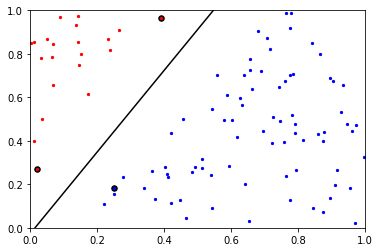

In [3]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

def loadDataSet(filename):
    fr = open(filename)
    data = []
    label = []
    for line in fr.readlines():
        lineAttr = line.strip().split(',')
        data.append([float(x) for x in lineAttr[:-1]])
        label.append(float(lineAttr[-1]))
    return data,label

def fit(x, y):
    row = x.shape[0]
    K = y[:,None] * x
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((row, 1)))
    G = matrix(-np.eye(row))
    h = matrix(np.zeros(row))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    solver = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solver['x'])
    return alphas

def plot_data(x, y, ax):
    Color = ['red', 'blue']
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], s=5,c = Color[li])

def plot_wxb(ax, w, b):
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.arange(0,10,0.1)
    ax.plot(x, x * slope + intercept, 'k-')
    print('equation is: ''y=',slope,'x','+',intercept)




x, y = loadDataSet('linsep.txt')
x=np.array(x)
y=np.array(y)
# fit svm classifier
alphas = fit(x, y)
# get weights
w = np.sum(alphas * y[:, None] * x, axis = 0)
# get bias
cond = (alphas > 1e-5).reshape(-1)
b = y[cond] - np.dot(x[cond], w)
bias = b[0]
print('support vectors: \n',x[cond])

# show data and w
fig, ax = plt.subplots()
ax.scatter(x[cond][:, 0], x[cond][:, 1], s=30, c ='black')
plot_wxb(ax, w, bias)
plot_data(x, y, ax)
plt.xlim((0.0,1.0))
plt.ylim((0.0,1.0))
plt.show()
